## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


## Load and Understand the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =pd.read_csv(r"/content/drive/MyDrive/Project /Intrenship/DataSets/Students' Academic Performance Dataset.csv")
df.sample(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
395,M,Jordan,Palestine,MiddleSchool,G-07,A,Biology,S,Mum,70,98,54,72,Yes,Good,Under-7,H
232,M,Syria,Syria,MiddleSchool,G-07,A,Quran,F,Father,19,72,15,50,Yes,Good,Above-7,M
162,F,Jordan,Jordan,lowerlevel,G-02,B,French,S,Mum,70,82,3,73,No,Bad,Under-7,H
305,F,Jordan,Jordan,lowerlevel,G-04,B,Science,S,Father,32,44,29,89,Yes,Bad,Under-7,M
290,F,Jordan,Jordan,lowerlevel,G-04,A,Science,F,Father,49,36,32,44,No,Bad,Above-7,L


In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
df.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [6]:
df.shape

(480, 17)

In [7]:
print(df.describe())

       raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000


## Data Cleaning

In [10]:
# Check for missing values
print(df.isnull().sum())

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [11]:
# Drop NA values if needed
df = df.dropna()

In [12]:
# Remove duplicates
df = df.drop_duplicates()

In [14]:
# Convert 'Class' to numeric scores (e.g., A=3, B=2, C=1)
df['Class_num'] = df['Class'].map({'L': 1, 'M': 2, 'H': 3})  # Or {'C':1, 'B':2, 'A':3} if that's your dataset


In [15]:
X = df[['raisedhands', 'VisITedResources', 'Discussion']]
y = df['Class_num']


## Basic Visualization

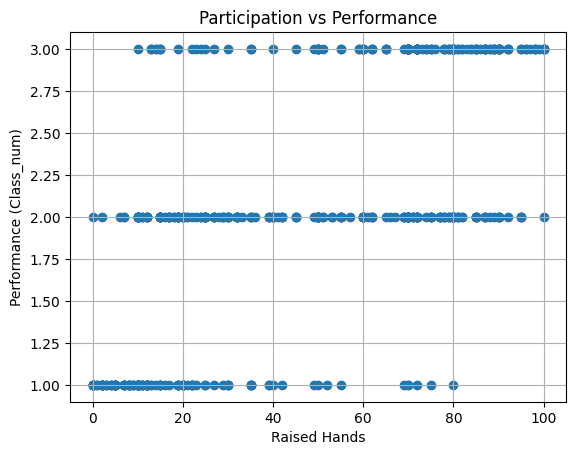

In [16]:
plt.scatter(df['raisedhands'], df['Class_num'])
plt.xlabel("Raised Hands")
plt.ylabel("Performance (Class_num)")
plt.title("Participation vs Performance")
plt.grid(True)
plt.show()

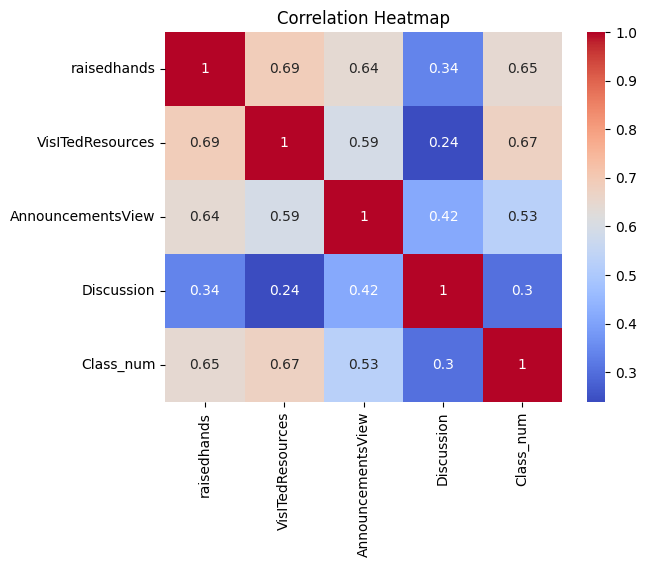

In [17]:
# Only use numerical columns
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Prepare Data for Modeling

In [19]:
X = df[['raisedhands', 'VisITedResources', 'Discussion']]  # Features
y = df['Class_num']     # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a Linear Regression Model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


## Visualize Predictions

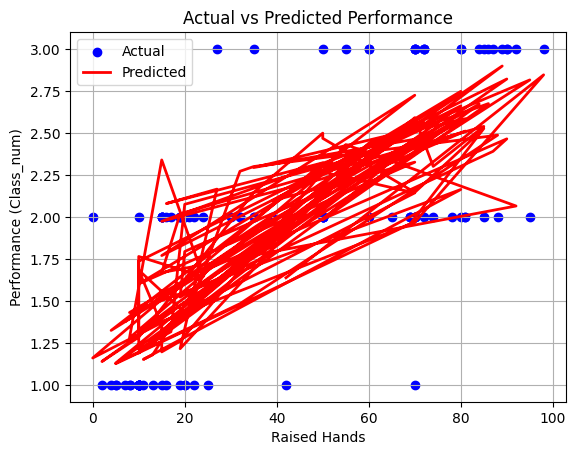

In [22]:
plt.scatter(X_test['raisedhands'], y_test, color='blue', label='Actual')
plt.plot(X_test['raisedhands'], y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Raised Hands")
plt.ylabel("Performance (Class_num)")
plt.title("Actual vs Predicted Performance")
plt.legend()
plt.grid(True)
plt.show()

## Evaluate Model Performance

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.22408252786838956
R^2 Score: 0.577420794590735


## Try Polynomial Regression

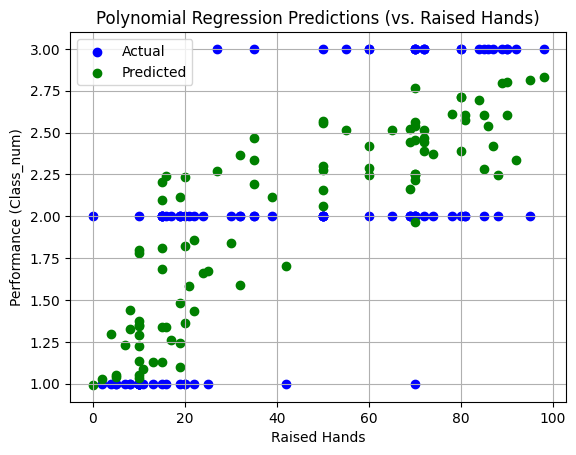

Polynomial MSE: 0.22785724220099532
Polynomial R2: 0.5703023646154343


In [26]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split again with poly features
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_poly_pred = poly_model.predict(X_test_poly)

# Plot (using a single feature from the original X_test for visualization)
plt.scatter(X_test['raisedhands'], y_test, color='blue', label='Actual')
# To plot the polynomial prediction line, we need to sort the x-values and predict on those sorted values
# However, with multiple features, a simple 2D line plot against a single feature is not fully representative.
# For a more accurate representation, you might need 3D plots or visualizing residuals.
# For demonstration, we'll plot the predictions against the 'raisedhands' from the original X_test,
# which is not perfectly ordered for a line plot but shows the predicted points.
plt.scatter(X_test['raisedhands'], y_poly_pred, color='green', label='Predicted')
plt.title("Polynomial Regression Predictions (vs. Raised Hands)")
plt.xlabel("Raised Hands")
plt.ylabel("Performance (Class_num)")
plt.legend()
plt.grid(True)
plt.show()


# Evaluation
print(f"Polynomial MSE: {mean_squared_error(y_test, y_poly_pred)}")
print(f"Polynomial R2: {r2_score(y_test, y_poly_pred)}")